In [25]:
import tensorflow as tf

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
PATH = "/Users/agun/school/chest_xray/chest_xray"

In [28]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')
test_dir = os.path.join(PATH, 'test')

In [29]:
train_normal = os.path.join(train_dir ,'NORMAL')
train_pneu   = os.path.join(train_dir ,'PNEUMONIA')
validation_normal = os.path.join(validation_dir , 'NORMAL')
validation_pnem = os.path.join(validation_dir , 'PNEUMONIA')
test_normal = os.path.join(test_dir ,'NORMAL')
test_pnem   = os.path.join(test_dir ,'PNEUMONIA')

In [30]:
num_normal_tr = len(os.listdir(train_normal))
num_pnem_tr = len(os.listdir(train_pneu))

num_normal_val = len(os.listdir(validation_normal))
num_pnem_val = len(os.listdir(validation_pnem))

num_normal_test = len(os.listdir(test_normal))
num_pnem_test = len(os.listdir(test_pnem))

total_train = num_normal_tr + num_pnem_tr
total_val = num_normal_val + num_pnem_val
total_test = num_normal_test + num_pnem_test

print('total training normal images:', num_normal_tr)
print('total training pnemonia images:', num_pnem_tr)

print('total validation normal images:', num_normal_val)
print('total validation pnemonia images:', num_pnem_val)

print('total test normal images:', num_normal_test)
print('total test pnemonia images:', num_pnem_test)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total test images:", total_test)

total training normal images: 1341
total training pnemonia images: 3876
total validation normal images: 8
total validation pnemonia images: 8
total test normal images: 234
total test pnemonia images: 390
--
Total training images: 5217
Total validation images: 16
Total test images: 624


In [31]:
list_train_normal_ds = tf.data.Dataset.list_files(str(train_dir + '*/NORMAL/*.jpeg'))
list_train_pneu_ds = tf.data.Dataset.list_files(str(train_dir + '*/PNEUMONIA/*.jpeg'))
list_val_normal_ds = tf.data.Dataset.list_files(str(validation_dir + '*/NORMAL/*.jpeg'))
list_val_pneu_ds = tf.data.Dataset.list_files(str(validation_dir + '*/PNEUMONIA/*.jpeg'))

In [32]:
list_combined_normal = list_train_normal_ds.concatenate(list_val_normal_ds)
list_combined_pnem = list_train_pneu_ds.concatenate(list_val_pneu_ds)

In [33]:
total_val_train_combined_normal = len(list(list_combined_normal.as_numpy_iterator()))
total_val_train_combined_pnem = len(list(list_combined_pnem.as_numpy_iterator()))
print("Total normal images after combining train and validation:",total_val_train_combined_normal)
print("Total pneumonia images after combining train and validation:",total_val_train_combined_pnem)

Total normal images after combining train and validation: 1349
Total pneumonia images after combining train and validation: 3883


In [34]:
val_normal_size = int(0.15 * total_val_train_combined_normal)
val_pnem_size = int(0.10 * total_val_train_combined_pnem)

list_combined_normal_ds = list_combined_normal.shuffle(1000)
list_combined_normal = list(list_combined_normal_ds.as_numpy_iterator())

list_val_normal = list_combined_normal[:val_normal_size]
list_train_normal = list_combined_normal[val_normal_size:]

list_val_normal_dataset = tf.data.Dataset.from_tensor_slices(list_val_normal)
list_train_normal_dataset = tf.data.Dataset.from_tensor_slices(list_train_normal)

In [35]:
len(set(list(list_val_normal_dataset.as_numpy_iterator())) & set(list(list_train_normal_dataset.as_numpy_iterator())))

0

In [36]:
list_combined_pnem_ds = list_combined_pnem.shuffle(4000)
list_combined_pnem = list(list_combined_pnem_ds.as_numpy_iterator())

list_val_pnem = list_combined_pnem[:val_pnem_size]
list_train_pnem = list_combined_pnem[val_pnem_size:]

list_val_pnem_dataset = tf.data.Dataset.from_tensor_slices(list_val_pnem)
list_train_pnem_dataset = tf.data.Dataset.from_tensor_slices(list_train_pnem)

In [37]:
len(set(list(list_val_pnem_dataset.as_numpy_iterator())) & set(list(list_train_pnem_dataset.as_numpy_iterator())))

0

In [38]:
list_val_ds = list_val_normal_dataset.concatenate(list_val_pnem_dataset).shuffle(500)
list_train_ds = list_train_normal_dataset.concatenate(list_train_pnem_dataset).shuffle(4600)
list_test_ds = tf.data.Dataset.list_files(str(test_dir + '*/*/*'), shuffle=False)

In [39]:
len(set(list(list_val_ds.as_numpy_iterator())) & set(list(list_train_ds.as_numpy_iterator())) & set(list(list_test_ds.as_numpy_iterator())))

0

In [40]:
total_train = len(list(list_train_ds.as_numpy_iterator()))
total_val = len(list(list_val_ds.as_numpy_iterator()))
print("Total train after split:",total_train)
print("Total validation after split:", total_val)
print("Total test:", len(list(list_test_ds.as_numpy_iterator())))

Total train after split: 4642
Total validation after split: 590
Total test: 624


In [41]:
for f in list_train_ds.take(5):
  print(f.numpy())

b'/Users/agun/school/chest_xray/chest_xray/train/PNEUMONIA/person19_bacteria_58.jpeg'
b'/Users/agun/school/chest_xray/chest_xray/train/PNEUMONIA/person148_virus_298.jpeg'
b'/Users/agun/school/chest_xray/chest_xray/train/PNEUMONIA/person493_bacteria_2087.jpeg'
b'/Users/agun/school/chest_xray/chest_xray/train/PNEUMONIA/person272_virus_559.jpeg'
b'/Users/agun/school/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0815-0001.jpeg'


In [42]:
for f in list_val_ds.take(5):
  print(f.numpy())

b'/Users/agun/school/chest_xray/chest_xray/train/PNEUMONIA/person1392_bacteria_3538.jpeg'
b'/Users/agun/school/chest_xray/chest_xray/train/PNEUMONIA/person1214_virus_2059.jpeg'
b'/Users/agun/school/chest_xray/chest_xray/train/PNEUMONIA/person20_bacteria_69.jpeg'
b'/Users/agun/school/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0863-0001.jpeg'
b'/Users/agun/school/chest_xray/chest_xray/train/PNEUMONIA/person557_bacteria_2327.jpeg'


In [43]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
BATCH_SIZE = 32

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [44]:
def get_label(file_path):  
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  #The second to last is the class-directory
  if (parts[-2] == 'PNEUMONIA'):
    class_label = 1
  else:
    class_label = 0
  return class_label

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [45]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_train_ds = list_train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
labeled_val_ds = list_val_ds.map(process_path, num_parallel_calls=AUTOTUNE)
labeled_test_ds = list_test_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [46]:
for image, label in labeled_train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  1


In [47]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=4000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)#, reshuffle_each_iteration = True)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [48]:
train_ds = prepare_for_training(labeled_train_ds)
image_batch, label_batch = next(iter(train_ds))

In [49]:
image_batch.numpy().shape

(32, 224, 224, 3)

In [50]:
label_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int32)>

In [51]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(label_batch[n].numpy())
      plt.axis('off')

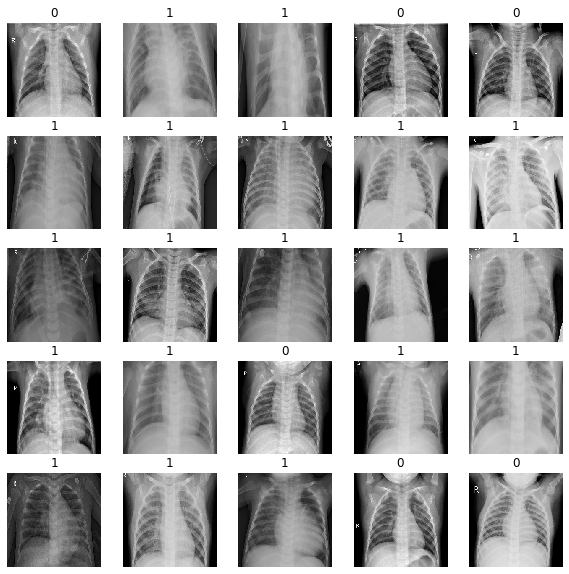

In [52]:
show_batch(image_batch, label_batch)

In [53]:
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 1s 0us/step


In [54]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [55]:
base_model.trainable = False

In [56]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [57]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [58]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [59]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.0001,
  decay_steps=(total_train // BATCH_SIZE)*15,
  decay_rate=1,
  staircase=False)

In [60]:
def get_optimizer():
  return tf.keras.optimizers.RMSprop(lr_schedule)

In [61]:
base_learning_rate = 0.0001
model.compile(optimizer=get_optimizer(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [63]:
initial_epochs = 15
validation_steps=total_val // BATCH_SIZE

loss0,accuracy0 = model.evaluate(labeled_val_ds.batch(32), steps = validation_steps)

18/18 [==============================] - 7s 378ms/step - loss: 0.8038 - accuracy: 0.3819


In [64]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.80
initial accuracy: 0.38


In [65]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    steps_per_epoch=total_train // BATCH_SIZE,
                    validation_data=labeled_val_ds.batch(32),
                    validation_steps=total_val // BATCH_SIZE)

Epoch 1/15
145/145 [==============================] - 52s 360ms/step - loss: 0.4788 - accuracy: 0.7425 - val_loss: 0.4792 - val_accuracy: 0.8056
Epoch 2/15
145/145 [==============================] - 52s 356ms/step - loss: 0.3368 - accuracy: 0.8804 - val_loss: 0.3653 - val_accuracy: 0.8889
Epoch 3/15
145/145 [==============================] - 50s 347ms/step - loss: 0.2665 - accuracy: 0.9078 - val_loss: 0.3038 - val_accuracy: 0.9115
Epoch 4/15
145/145 [==============================] - 51s 351ms/step - loss: 0.2262 - accuracy: 0.9224 - val_loss: 0.2642 - val_accuracy: 0.9219
Epoch 5/15
145/145 [==============================] - 50s 346ms/step - loss: 0.2002 - accuracy: 0.9302 - val_loss: 0.2366 - val_accuracy: 0.9306
Epoch 6/15
145/145 [==============================] - 51s 352ms/step - loss: 0.1835 - accuracy: 0.9349 - val_loss: 0.2244 - val_accuracy: 0.9427
Epoch 7/15
145/145 [==============================] - 50s 346ms/step - loss: 0.1705 - accuracy: 0.9394 - val_loss: 0.2117 - val_ac

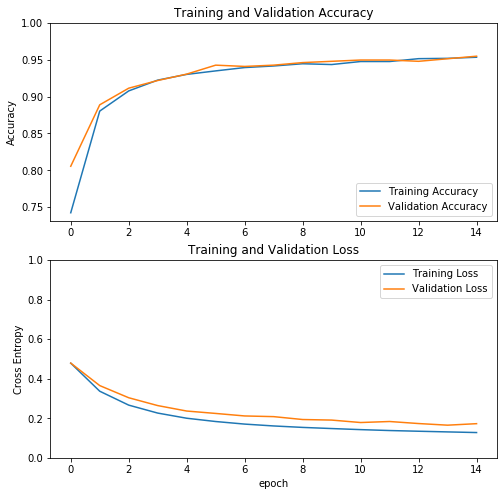

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [67]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [68]:
# Also using a much lower learning rate..
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])


In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [70]:
len(model.trainable_variables)

2

In [71]:
fine_tune_epochs = 12
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         steps_per_epoch=total_train // BATCH_SIZE,
                         initial_epoch =  history.epoch[-1],
                         validation_data=labeled_val_ds.batch(32),
                         validation_steps=total_val // BATCH_SIZE
                         )

Epoch 15/27
145/145 [==============================] - 51s 355ms/step - loss: 0.1265 - accuracy: 0.9545 - val_loss: 0.1704 - val_accuracy: 0.9514
Epoch 16/27
145/145 [==============================] - 50s 346ms/step - loss: 0.1262 - accuracy: 0.9537 - val_loss: 0.1633 - val_accuracy: 0.9514
Epoch 17/27
145/145 [==============================] - 51s 350ms/step - loss: 0.1256 - accuracy: 0.9545 - val_loss: 0.1657 - val_accuracy: 0.9531
Epoch 18/27
145/145 [==============================] - 50s 344ms/step - loss: 0.1249 - accuracy: 0.9556 - val_loss: 0.1675 - val_accuracy: 0.9514
Epoch 19/27
145/145 [==============================] - 51s 349ms/step - loss: 0.1245 - accuracy: 0.9550 - val_loss: 0.1680 - val_accuracy: 0.9497
Epoch 20/27
145/145 [==============================] - 51s 349ms/step - loss: 0.1245 - accuracy: 0.9547 - val_loss: 0.1599 - val_accuracy: 0.9549
Epoch 21/27
145/145 [==============================] - 50s 345ms/step - loss: 0.1236 - accuracy: 0.9554 - val_loss: 0.1616 -

In [72]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

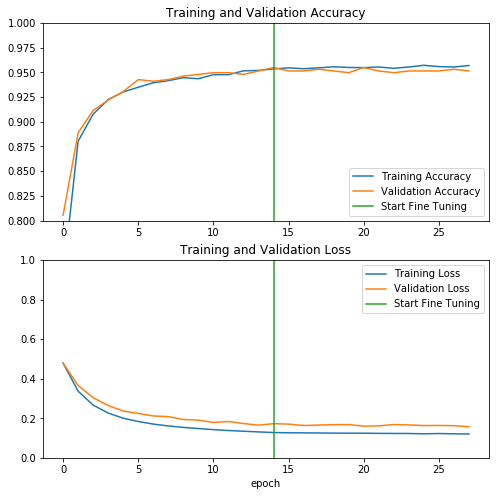

In [73]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [74]:
model.evaluate(labeled_test_ds.batch(32))

20/20 [==============================] - 7s 348ms/step - loss: 0.4034 - accuracy: 0.8494


[0.40337955951690674, 0.8493589758872986]

In [75]:
predictions_logits = model.predict(labeled_test_ds.batch(32))
prediction_labels = np.where(predictions_logits >=0, 1, 0)